In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import Counter
import os


import create_model
from config import Facnet_config

from forward_all_images import forward_all_images
from test_model import test_model

from sklearn.cluster import KMeans
from cluster_training import cluster_training
from KNC import KNC

import datetime

# Functions

In [2]:
train_acc = np.load(r'data1\train_acc.npy')
test_acc  = np.load(r'data1\test_acc.npy')

In [16]:
test_acc.max()

0.9806944444444444

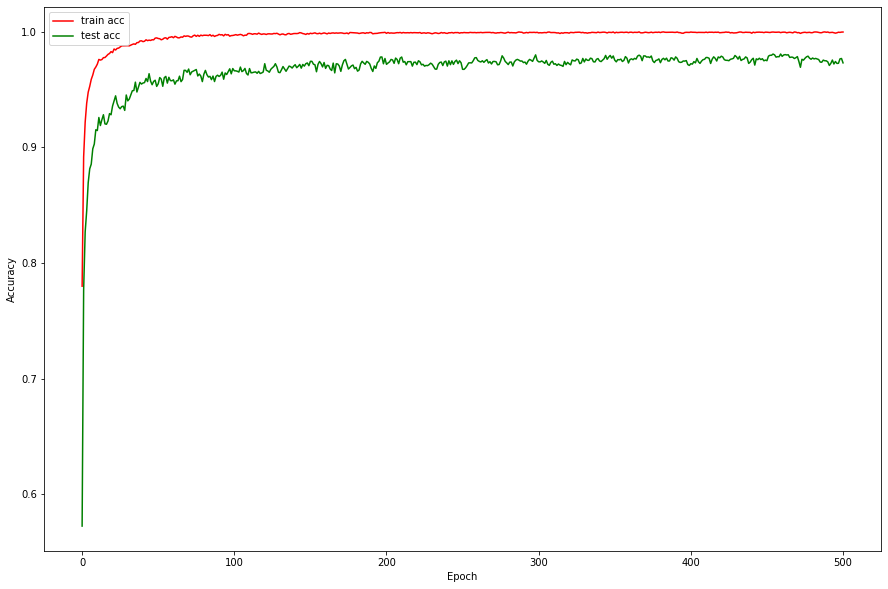

In [3]:
fig     = plt.figure(figsize=(15, 10))
plt.plot(train_acc,color='r',label='train acc')
plt.plot(test_acc,color='g',label='test acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Upload data

In [5]:
#images_train = 
#labels_train = 

#images_test  = 
#labels_test  = 

# Download model

In [6]:
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = create_model.WRN2(2)
model.load_state_dict(torch.load(r'models\model'+str(500)+'.pth'))
model     = model.to(device=device, dtype=torch.float)
model.eval()

WRN2(
  (init_conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (unit1): Sequential(
    (0): residual(
      (pre_act): Sequential(
        (0): LeakyReLU(negative_slope=0.1)
      )
      (identity): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): LeakyReLU(negative_slope=0.1)
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (1): residual(
      (pre_act): Identity()
      (identity): Identity()
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.1)
        (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (2): LeakyReLU(negative_slope=0.1)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (2): residual(
      (pre_act): Identity()
  

# Main

In [7]:
train_features  = forward_all_images(model,device,images_train)
test_features   = forward_all_images(model,device,images_test)

In [8]:
clusters_centers,clusters_labels,samples_indices,sigma = cluster_training(train_features,labels_train)

# prediction using KNN

In [17]:
a = datetime.datetime.now()
_,test_acc_1   = test_model(train_features, labels_train,test_features,labels_test)
b = datetime.datetime.now()
print(b-a)

0:00:49.474963


In [ ]:
test_acc_1

# prediction using clusters centers

In [14]:
a = datetime.datetime.now()
labels_test,acc = KNC(clusters_centers, clusters_labels,test_features,labels_test,sigma)
b = datetime.datetime.now()
print(b-a)

0:00:02.575187


In [15]:
acc

0.9041388888888889